In [1]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv(r"C:\Users\lenovo\Desktop\assignments\5 multi linear reg\50_Startups.csv")

In [6]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [7]:
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

In [8]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [10]:
df_state = pd.get_dummies(df['State'])

In [11]:
df_state

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,1,0,0
7,0,1,0
8,0,0,1
9,1,0,0


In [20]:
data = pd.concat([df, df_state], axis=1)

In [21]:
data

,R&D Spend,Administration,Marketing Spend,State,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0
5,131876.90,99814.71,362861.36,New York,156991.12,0,0,1
6,134615.46,147198.87,127716.82,California,156122.51,1,0,0
7,130298.13,145530.06,323876.68,Florida,155752.60,0,1,0
8,120542.52,148718.95,311613.29,New York,152211.77,0,0,1
9,123334.88,108679.17,304981.62,California,149759.96,1,0,0


In [22]:
data.drop(['State'], axis=1)

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [24]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
R&D Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
New York,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


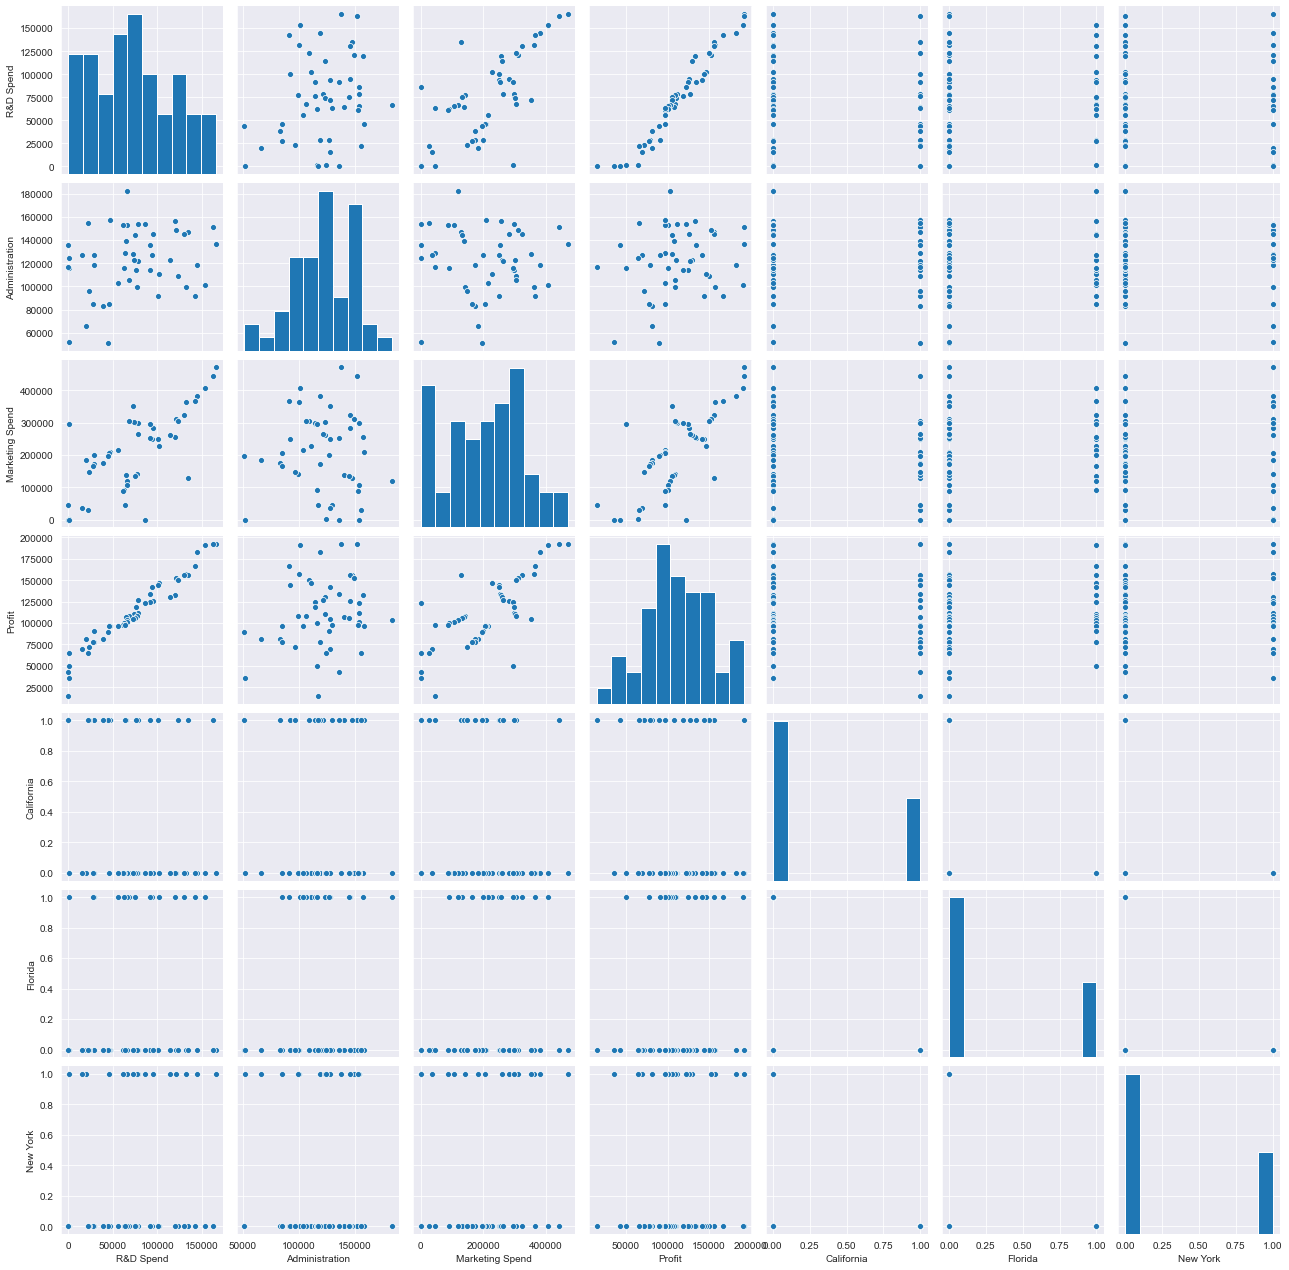

In [26]:
import seaborn as sns
sns.set_style(style='darkgrid')
sns.pairplot(data)

In [39]:
datanew = data.rename(columns={'R&D Spend' : 'RandD' , 'New York' : 'Newyork' , 'Marketing Spend' : 'Marketingspend'})

In [40]:
datanew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RandD           50 non-null     float64
 1   Administration  50 non-null     float64
 2   Marketingspend  50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
 5   California      50 non-null     uint8  
 6   Florida         50 non-null     uint8  
 7   Newyork         50 non-null     uint8  
dtypes: float64(4), object(1), uint8(3)
memory usage: 2.2+ KB


In [43]:
datanew[datanew.duplicated()]

,RandD,Administration,Marketingspend,State,Profit,California,Florida,Newyork


In [44]:
datanew.describe()

,RandD,Administration,Marketingspend,Profit,California,Florida,Newyork
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200,0.340000,0.320000,0.340000
std,45902.256482,28017.802755,122290.310726,40306.180338,0.478518,0.471212,0.478518
min,0.000000,51283.140000,0.000000,14681.400000,0.000000,0.000000,0.000000
25%,39936.370000,103730.875000,129300.132500,90138.902500,0.000000,0.000000,0.000000
50%,73051.080000,122699.795000,212716.240000,107978.190000,0.000000,0.000000,0.000000
75%,101602.800000,144842.180000,299469.085000,139765.977500,1.000000,1.000000,1.000000
max,165349.200000,182645.560000,471784.100000,192261.830000,1.000000,1.000000,1.000000


In [46]:
datanew[datanew.isnull().any(axis=1)]

,RandD,Administration,Marketingspend,State,Profit,California,Florida,Newyork


In [47]:
import statsmodels.formula.api as smf
model1=smf.ols('Profit~RandD+Administration+Marketingspend+California+Florida+Newyork',data=datanew).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sat, 26 Dec 2020   Prob (F-statistic):           1.34e-27
Time:                        19:04:45   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3.763e+04   5073.636      7.417      0.000    2.74e+04    4.79e+04
RandD              0.8060      0.046     17.369      0.000       0.712       0.900
Administration    -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketingspend     0.0270      0.017      1.574      0.123      -0.008       0.062
California      1.249e+04   2449.797      5.099      0.000    7554.868    1.74e+04
Florida         1.269e+04   2726.700      4.654      0.000    7195.596    1.82e+04
Newyork         1.245e+04   2486.364      5.007      0.000    7439.285    1.75e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     2.98e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.37e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [48]:
model1.params

Intercept         37633.233317
RandD                 0.806023
Administration       -0.027004
Marketingspend        0.026980
California        12492.110514
Florida           12690.899307
Newyork           12450.223495
dtype: float64

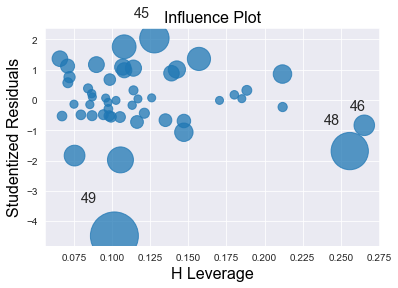

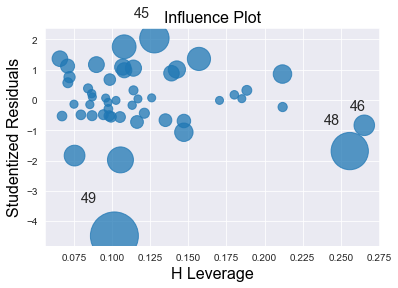

In [50]:
influence_plot(model1)

In [51]:
data_new=datanew.drop(datanew.index[[49,48,45]],axis=0)

In [52]:
data_new

,RandD,Administration,Marketingspend,State,Profit,California,Florida,Newyork
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0
5,131876.90,99814.71,362861.36,New York,156991.12,0,0,1
6,134615.46,147198.87,127716.82,California,156122.51,1,0,0
7,130298.13,145530.06,323876.68,Florida,155752.60,0,1,0
8,120542.52,148718.95,311613.29,New York,152211.77,0,0,1
9,123334.88,108679.17,304981.62,California,149759.96,1,0,0


In [53]:
model1_new=smf.ols('Profit~RandD+Administration+Marketingspend+California+Florida+Newyork',data=data_new).fit()

In [56]:
model1_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     223.0
Date:                Mon, 28 Dec 2020   Prob (F-statistic):           1.35e-28
Time:                        15:59:03   Log-Likelihood:                -481.36
No. Observations:                  47   AIC:                             974.7
Df Residuals:                      41   BIC:                             985.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.278e+04   4474.528      9.561      0.000    3.37e+04    5.18e+04
RandD              0.7961      0.036     21.942      0.000       0.723       0.869
Administration    -0.0612      0.044     -1.404      0.168      -0.149       0.027
Marketingspend     0.0213      0.014      1.553      0.128      -0.006       0.049
California      1.534e+04   1971.111      7.783      0.000    1.14e+04    1.93e+04
Florida         1.391e+04   2192.475      6.345      0.000    9484.039    1.83e+04
Newyork         1.353e+04   2226.339      6.077      0.000    9032.304     1.8e+04
==============================================================================
Omnibus:                        0.059   Durbin-Watson:                   1.766
Prob(Omnibus):                  0.971   Jarque-Bera (JB):                0.230
Skew:                           0.060   Prob(JB):                        0.891
Kurtosis:                       2.679   Cond. No.                     2.31e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.26e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [57]:
model1_new.params

Intercept         42781.109025
RandD                 0.796070
Administration       -0.061155
Marketingspend        0.021292
California        15340.789848
Florida           13911.832246
Newyork           13528.486931
dtype: float64

In [58]:
pred = model1_new.predict(data_new[['RandD','Administration','Marketingspend','California','Florida','Newyork']])
pred

0     189612.190338
1     187754.858010
2     181343.159891
3     172141.698024
4     172027.591447
5     162914.576111
6     159002.548273
7     158415.318614
8     149809.696819
9     156152.365608
10    135938.694123
11    137967.828441
12    128948.239151
13    128447.695371
14    148064.041299
15    145553.394222
16    118417.826543
17    128807.534176
18    129028.571041
19    115717.521858
20    118220.782782
21    115690.940425
22    114547.143643
23    110475.358027
24    114563.514377
25    104002.566382
26    110699.459877
27    113412.564962
28    100620.390203
29    101458.575113
30    100913.142027
31     97518.206169
32    101678.552747
33     99137.426921
34     89924.701139
35     92114.684584
36     76023.451847
37     94263.513721
38     72325.296604
39     87468.399324
40     77441.734936
41     77218.993825
42     74210.408934
43     61619.706220
44     66912.992255
46     56983.408057
47     49839.805531
dtype: float64

In [60]:
rsq_RandD = smf.ols('RandD~Administration+Marketingspend+California+Florida+Newyork',data=data_new).fit().rsquared  
vif_RandD = 1/(1-rsq_RandD)

rsq_Administration = smf.ols('Administration~RandD+Marketingspend+California+Florida+Newyork',data=data_new).fit().rsquared  
vif_Administration = 1/(1-rsq_Administration)

rsq_Marketingspend = smf.ols('Marketingspend~RandD+Administration+California+Florida+Newyork',data=data_new).fit().rsquared  
vif_Marketingspend = 1/(1-rsq_Marketingspend)

rsq_California = smf.ols('California~RandD+Administration+Marketingspend+Florida+Newyork',data=data_new).fit().rsquared  
vif_California = 1/(1-rsq_California)

rsq_Florida = smf.ols('Florida~RandD+Administration+Marketingspend+California+Newyork',data=data_new).fit().rsquared  
vif_Florida = 1/(1-rsq_Florida)

rsq_Newyork = smf.ols('Newyork~RandD+Administration+Marketingspend+California+Florida',data=data_new).fit().rsquared  
vif_Newyork = 1/(1-rsq_Newyork)

<ipython-input-60-397e0f26a6c8>:11: RuntimeWarning: divide by zero encountered in double_scalars
  vif_California = 1/(1-rsq_California)
<ipython-input-60-397e0f26a6c8>:14: RuntimeWarning: divide by zero encountered in double_scalars
  vif_Florida = 1/(1-rsq_Florida)
<ipython-input-60-397e0f26a6c8>:17: RuntimeWarning: divide by zero encountered in double_scalars
  vif_Newyork = 1/(1-rsq_Newyork)


In [61]:
d1 = {'Variables':['RandD','Administration','Marketingspend','California','Florida','Newyork'],'VIF':[vif_RandD,vif_Administration,vif_Marketingspend,vif_California,vif_Florida,vif_Newyork]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RandD,2.147206
1,Administration,1.203033
2,Marketingspend,2.171433
3,California,inf
4,Florida,inf
5,Newyork,inf


Text(0, 0.5, 'fitted_values')

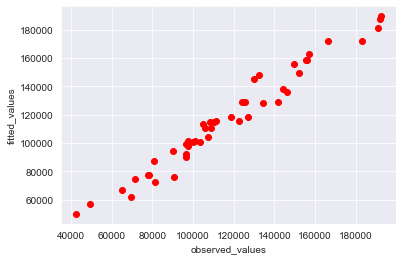

In [62]:
plt.scatter(data_new.Profit,pred,c="r");plt.xlabel("observed_values");plt.ylabel("fitted_values")

Text(0, 0.5, 'residuals')

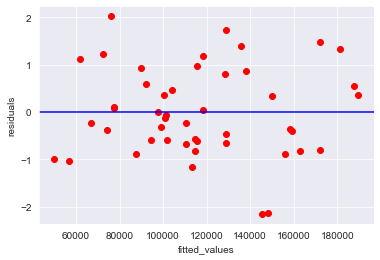

In [63]:
plt.scatter(pred,model1_new.resid_pearson,c="r"),plt.axhline(y=0,color='blue');plt.xlabel("fitted_values");plt.ylabel("residuals")

(array([ 2.,  0.,  3., 11.,  8.,  6.,  5.,  6.,  4.,  2.]),
 array([-2.15174442, -1.73449088, -1.31723734, -0.89998381, -0.48273027,
        -0.06547673,  0.35177681,  0.76903035,  1.18628389,  1.60353743,
         2.02079097]),
 <a list of 10 Patch objects>)

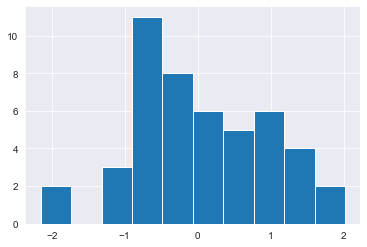

In [64]:
plt.hist(model1_new.resid_pearson)

((array([-2.17970694, -1.80519598, -1.583668  , -1.42038866, -1.28807506,
         -1.17512401, -1.07545654, -0.98546513, -0.90282096, -0.82592578,
         -0.75362993, -0.68507477, -0.61959872, -0.55667825, -0.49588925,
         -0.43688076, -0.37935657, -0.32306189, -0.26777354, -0.21329239,
         -0.15943751, -0.10604146, -0.05294626,  0.        ,  0.05294626,
          0.10604146,  0.15943751,  0.21329239,  0.26777354,  0.32306189,
          0.37935657,  0.43688076,  0.49588925,  0.55667825,  0.61959872,
          0.68507477,  0.75362993,  0.82592578,  0.90282096,  0.98546513,
          1.07545654,  1.17512401,  1.28807506,  1.42038866,  1.583668  ,
          1.80519598,  2.17970694]),
  array([-2.15174442, -2.12766749, -1.15652335, -1.031077  , -1.00182317,
         -0.88933443, -0.87966945, -0.82724888, -0.81513654, -0.80360404,
         -0.6833684 , -0.65526138, -0.60245283, -0.59370806, -0.58494757,
         -0.57726621, -0.47299382, -0.3963268 , -0.37319163, -0.36642109,
 

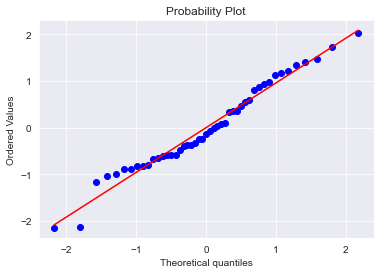

In [65]:
import pylab          
import scipy.stats as st
st.probplot(model1_new.resid_pearson, dist="norm", plot=pylab)

Text(0, 0.5, 'residuals')

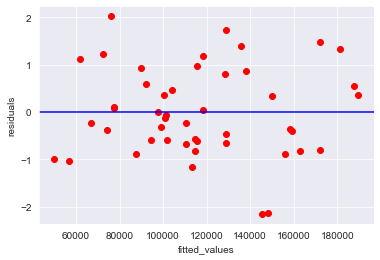

In [66]:
plt.scatter(pred,model1_new.resid_pearson,c="r"),plt.axhline(y=0,color='blue');plt.xlabel("fitted_values");plt.ylabel("residuals")